Практическая взята с https://www.tensorflow.org/beta/tutorials/keras/basic_classification

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


После подключения необходимых библиотек и модулей нужно загрузить данные для обучения и тестировки нейронки

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
#форматы одежды
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
#проверка тестировочных данных
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [11]:
#провекра тестовых данных
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


Пиксельные значения колеблются в дипозоне от 0 до 255

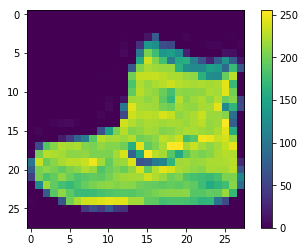

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Чтобы изображения стали чёрно-белыми, пиксельные значения должны колебаться в значении от 0 до 1

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

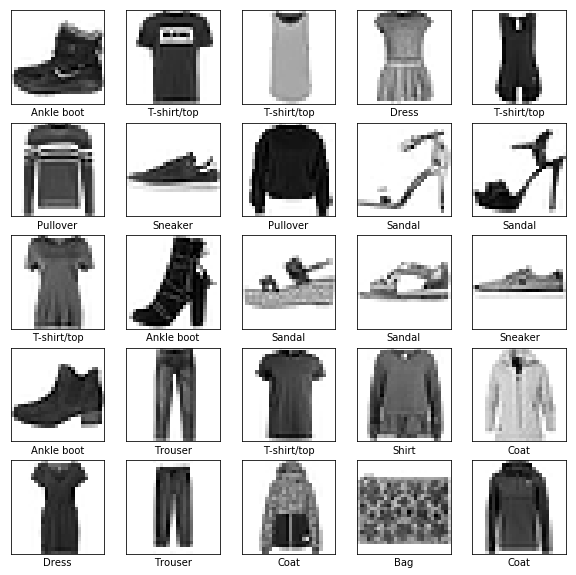

In [18]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [21]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [27]:
model.fit(train_images, train_labels, epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 42us/sample - loss: 0.1690 - accuracy: 0.9351
Epoch 2/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1642 - accuracy: 0.9387
Epoch 3/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1598 - accuracy: 0.9401
Epoch 4/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1556 - accuracy: 0.9420
Epoch 5/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1549 - accuracy: 0.9419
Epoch 6/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1503 - accuracy: 0.9433
Epoch 7/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1473 - accuracy: 0.9447
Epoch 8/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1451 - accuracy: 0.9456
Epoch 9/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1406 - accuracy: 0.9467
Epoch 10/20
60

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 18us/sample - loss: 0.4476 - accuracy: 0.8887

Test accuracy: 0.8887


In [29]:
predictions = model.predict(test_images)

In [31]:
np.argmax(predictions[0])

9

In [32]:
test_labels[0]

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

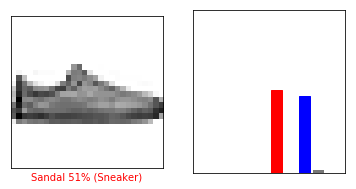

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

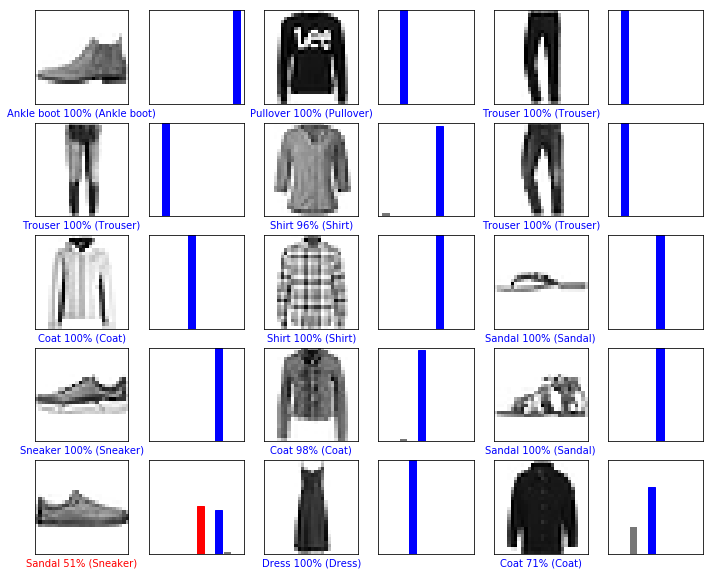

In [36]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [42]:
img = test_images[12]
img = (np.expand_dims(img, 0))

In [43]:
predictions_single = model.predict(img)

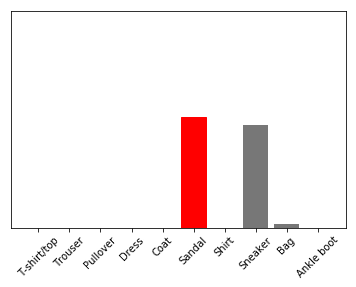

In [44]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)